## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


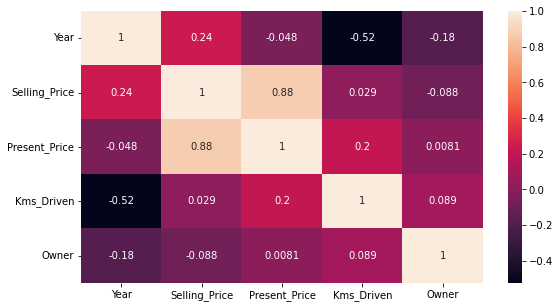

In [8]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [9]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
df["vehicle_age"]=2021-df.Year

In [11]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [12]:
df.drop(columns=["Year"], inplace=True)

In [13]:
#df=pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


## Train test split

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
X=df.drop("Selling_Price", axis=1)
y=df.Selling_Price

In [17]:
cat = X.select_dtypes("object").columns
cat

Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [18]:
enc = OrdinalEncoder()
X[cat] = enc.fit_transform(X[cat])
X.head()

,Car_Name,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,90.0,5.59,27000,2.0,0.0,1.0,0,7
1,93.0,9.54,43000,1.0,0.0,1.0,0,8
2,68.0,9.85,6900,2.0,0.0,1.0,0,4
3,96.0,4.15,5200,2.0,0.0,1.0,0,10
4,92.0,6.87,42450,1.0,0.0,1.0,0,7


In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (240, 8)
Train target shape   :  (240,)
Test features shape  :  (61, 8)
Test target shape    :  (61,)


## Modeling

In [20]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [21]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

## Adaboost Regressor

In [22]:
from sklearn.ensemble import AdaBoostRegressor

In [23]:
#base_estimator=DecisionTreeRegressor(max_depth=3)
ada_model = AdaBoostRegressor(random_state=101, n_estimators=50)

In [24]:
ada_model.fit(X_train, y_train)

AdaBoostRegressor(random_state=101)

In [25]:
train_val(ada_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.967360,0.938860
mae,0.730070,0.920171
mse,0.830186,1.641058
rmse,0.911145,1.281038


In [26]:
y_pred_ada = ada_model.predict(X_test)
y_pred_ada

array([ 5.93635135,  5.93635135,  4.81666667,  5.50203704,  3.14486486,
       10.00131313,  9.61186667,  1.08078947, 15.33333333,  5.25494253,
        5.93635135,  6.62080645,  4.25894737,  5.44085714,  1.08078947,
        3.48181818,  6.02      ,  1.08078947,  6.02      ,  1.08078947,
        5.44085714, 21.74923077, 19.6584127 ,  1.12391304,  3.746875  ,
        5.31938272,  5.78793103,  6.62745098,  5.78793103,  5.31938272,
        5.25494253,  9.74408602,  5.25494253,  1.08078947,  1.08078947,
        5.78793103,  6.35779661,  5.31938272,  1.12391304,  1.56258065,
        1.08078947,  5.29588235, 15.91716667,  1.08078947,  1.12391304,
        5.50203704,  1.08078947,  6.6330303 ,  3.48181818,  5.25494253,
        4.81666667, 21.74923077,  4.25894737,  1.12391304,  1.08078947,
        1.08078947,  3.14486486,  1.08078947,  1.08078947,  1.08078947,
        1.08078947])

In [27]:
from sklearn.model_selection import cross_validate, cross_val_score
model = AdaBoostRegressor(random_state=101, n_estimators=50)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.835971
test_neg_mean_absolute_error       -1.116024
test_neg_mean_squared_error        -4.898089
test_neg_root_mean_squared_error   -1.892615
dtype: float64

In [28]:
from sklearn.tree import plot_tree

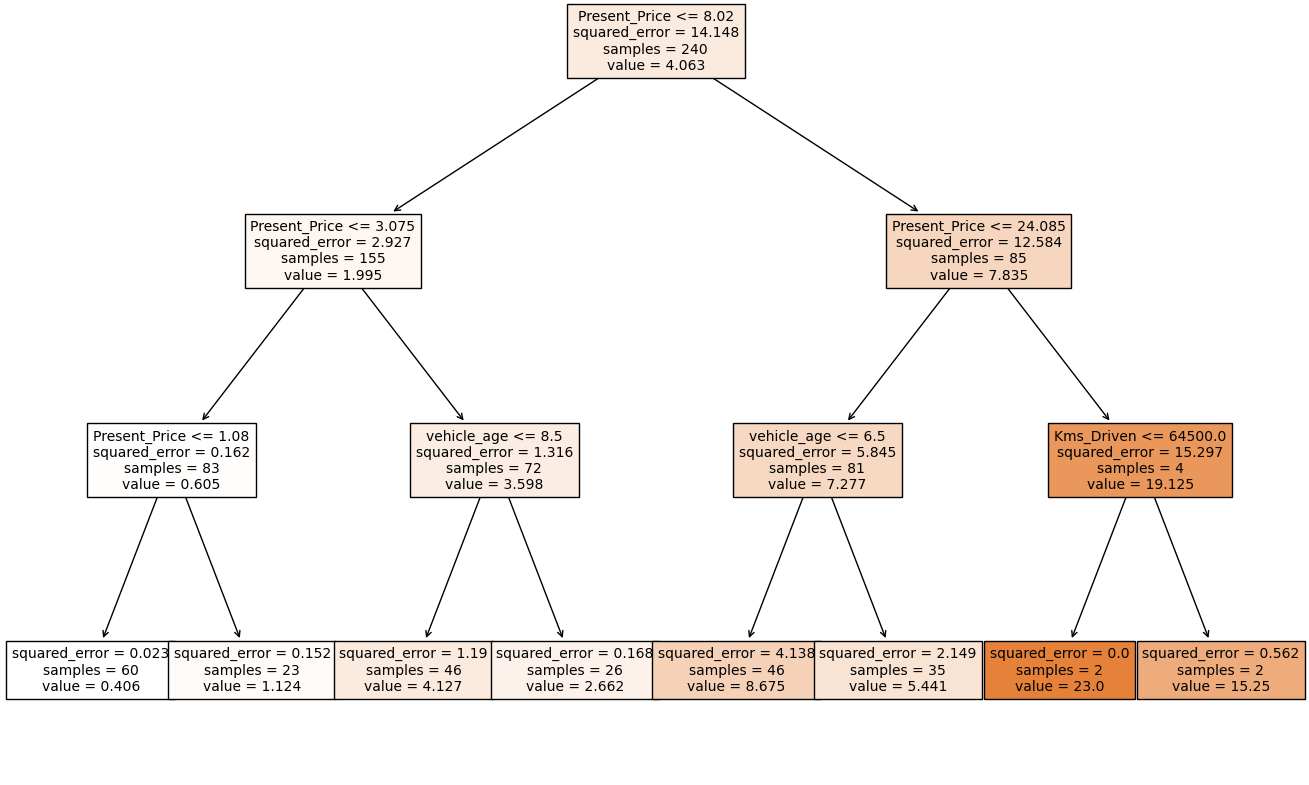

In [29]:
model = AdaBoostRegressor(random_state=101, n_estimators=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

features = list(X.columns)
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, fontsize=10);

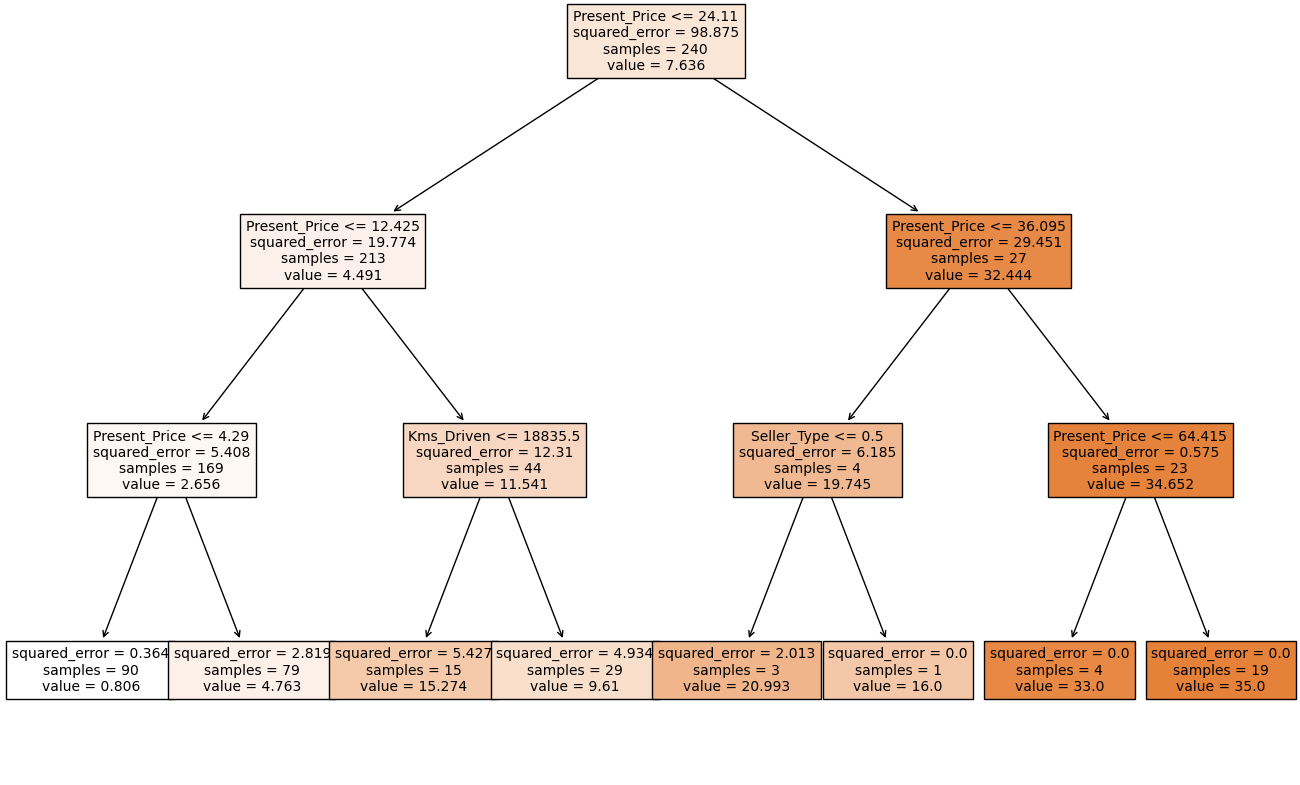

In [30]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[1], filled=True, feature_names=X.columns, fontsize=10);

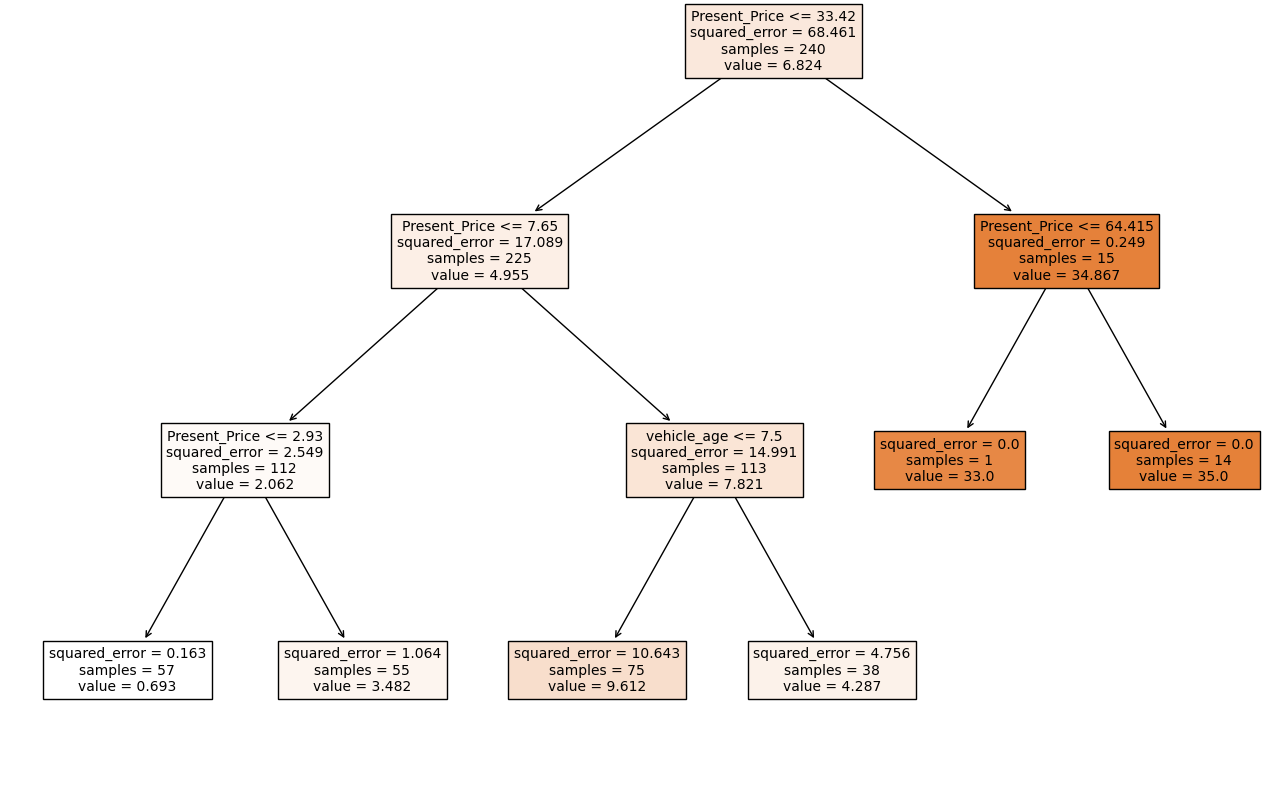

In [31]:
plt.figure(figsize=(12,8),dpi=100)
plot_tree(model.estimators_[2], filled=True, feature_names=X.columns, fontsize=10);

In [32]:
y_pred

array([ 5.44085714,  5.44085714,  4.12717391,  4.12717391,  4.12717391,
        9.61034483,  9.61034483,  0.69298246, 15.25      ,  4.12717391,
        5.44085714,  8.67478261,  4.12717391,  5.44085714,  0.69298246,
        4.12717391,  5.44085714,  0.69298246,  5.44085714,  0.69298246,
        5.44085714, 20.99333333, 20.99333333,  0.80633333,  3.48181818,
        4.12717391,  4.76253165,  8.67478261,  4.76253165,  5.44085714,
        4.12717391,  9.61034483,  4.12717391,  0.69298246,  0.69298246,
        4.76253165,  8.67478261,  4.12717391,  0.80633333,  3.48181818,
        0.69298246,  4.12717391,  9.61186667,  0.69298246,  0.80633333,
        4.12717391,  0.69298246,  8.67478261,  4.12717391,  4.76253165,
        4.12717391, 20.99333333,  4.28736842,  0.80633333,  0.69298246,
        0.69298246,  3.48181818,  0.69298246,  0.69298246,  0.69298246,
        0.69298246])

In [33]:
np.array(y_test)

array([ 9.25,  9.65,  3.65,  6.  ,  2.9 ,  8.25,  6.25,  0.6 , 14.9 ,
        5.5 ,  5.5 ,  6.5 ,  3.45,  3.49,  0.45,  3.5 ,  7.05,  0.35,
        6.95,  0.4 ,  3.8 , 23.  , 18.75,  1.  ,  1.95,  4.5 ,  4.5 ,
        9.1 ,  5.8 ,  4.35,  5.25,  9.7 ,  5.4 ,  0.2 ,  0.38,  6.15,
        7.75,  4.9 ,  1.05,  1.35,  0.75,  4.8 , 19.75,  0.17,  1.11,
        4.75,  0.2 ,  8.35,  2.9 ,  4.5 ,  5.15, 20.75,  2.25,  1.1 ,
        0.35,  0.15,  3.  ,  0.3 ,  0.2 ,  0.75,  0.45])

In [34]:
 #X_test

In [35]:
X_test.loc[67]

Car_Name            81.00
Present_Price       20.45
Kms_Driven       59000.00
Fuel_Type            1.00
Seller_Type          0.00
Transmission         1.00
Owner                0.00
vehicle_age         11.00
Name: 67, dtype: float64

## Gridsearch for Adaboosting

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {"n_estimators":[50, 100, 200, 300, 500],
              "learning_rate":[0.1, 0.5, 0.8, 1],
              "loss": ["linear", "square"]
            }

In [38]:
model = AdaBoostRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [39]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.8, 1],
                         'loss': ['linear', 'square'],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_root_mean_squared_error')

In [40]:
grid_model.best_params_

{'learning_rate': 1, 'loss': 'square', 'n_estimators': 300}

In [41]:
grid_model.best_score_

-1.7870767870408986

In [42]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.961240,0.939360
mae,0.830284,1.015983
mse,0.985835,1.627622
rmse,0.992892,1.275783


## Feature importance

In [43]:
model = AdaBoostRegressor(random_state=101,n_estimators=500, learning_rate=0.5)
model.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.5, n_estimators=500, random_state=101)

In [44]:
model.feature_importances_

array([0.01408638, 0.83349813, 0.03292981, 0.01693637, 0.00109642,
       0.00269668, 0.00121041, 0.0975458 ])

In [45]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['ada_Importance'])
ada_imp_feats = imp_feats.sort_values('ada_Importance')
ada_imp_feats

,ada_Importance
Seller_Type,0.001096
Owner,0.001210
Transmission,0.002697
Car_Name,0.014086
Fuel_Type,0.016936
Kms_Driven,0.032930
vehicle_age,0.097546
Present_Price,0.833498


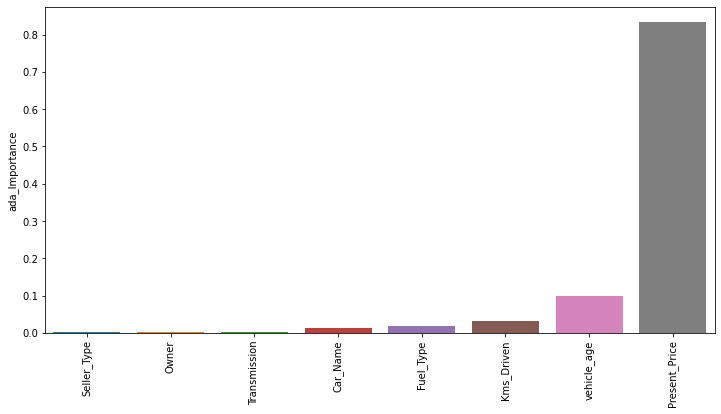

In [46]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')

plt.xticks(rotation=90);

## Gradient Boosting Regressor

In [47]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
grad_model = GradientBoostingRegressor(random_state=101)

In [49]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25

In [50]:
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=101)

In [51]:
train_val(grad_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996501,0.970278
mae,0.217741,0.533569
mse,0.088991,0.797770
rmse,0.298314,0.893180


In [52]:
model = GradientBoostingRegressor(random_state=101)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.890442
test_neg_mean_absolute_error       -0.751150
test_neg_mean_squared_error        -3.348033
test_neg_root_mean_squared_error   -1.552812
dtype: float64

## Gridsearch for Gradientboosting

In [53]:
param_grid = {"n_estimators":[100, 200, 300], "subsample":[0.8, 1], "max_features" : [None, 2, 3, 4],
            "learning_rate": [0.001, 0.01, 0.1, 0.5], 'max_depth':[2,3]}

In [54]:
model = GradientBoostingRegressor(random_state=101)
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [55]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [2, 3], 'max_features': [None, 2, 3, 4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1]},
             scoring='neg_root_mean_squared_error')

In [56]:
grid_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 2,
 'max_features': 4,
 'n_estimators': 300,
 'subsample': 0.8}

In [57]:
grid_model.best_score_

-1.3604843443220447

In [58]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.996280,0.95419
mae,0.228673,0.58534
mse,0.094620,1.22957
rmse,0.307604,1.10886


In [59]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300, subsample=0.8)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).mean()[2:]

test_r2                             0.911073
test_neg_mean_absolute_error       -0.720990
test_neg_mean_squared_error        -2.572960
test_neg_root_mean_squared_error   -1.360484
dtype: float64

## Feature importance

In [60]:
model = GradientBoostingRegressor(random_state=101, max_depth=2, max_features=4, n_estimators=300, subsample=0.8)
model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, max_features=4, n_estimators=300,
                          random_state=101, subsample=0.8)

In [61]:
model.feature_importances_

array([9.12937722e-02, 7.35751195e-01, 3.21390246e-02, 5.25140122e-02,
       1.35299779e-02, 2.01178997e-02, 2.58794909e-04, 5.43953234e-02])

In [62]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['grad_Importance'])
grad_imp_feats = imp_feats.sort_values('grad_Importance')
grad_imp_feats

,grad_Importance
Owner,0.000259
Seller_Type,0.013530
Transmission,0.020118
Kms_Driven,0.032139
Fuel_Type,0.052514
vehicle_age,0.054395
Car_Name,0.091294
Present_Price,0.735751


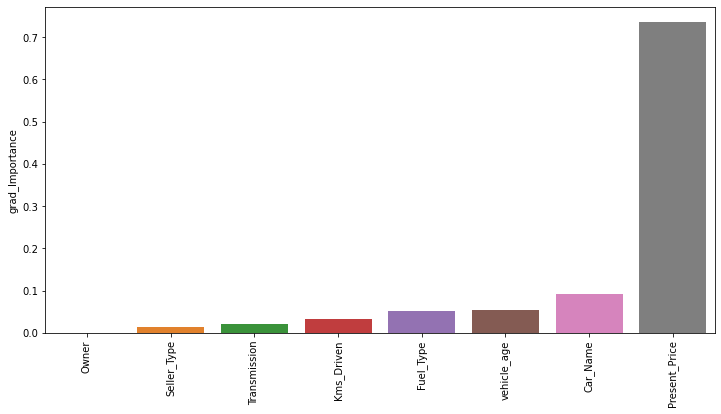

In [63]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')

plt.xticks(rotation=90);

## XG Boost Regressor

In [62]:
#!pip install --upgrade pip

In [63]:
#!pip install xgboost

In [64]:
from xgboost import XGBRegressor

In [65]:
xgb_model = XGBRegressor(random_state=101, objective="reg:squarederror") #objective="reg:squarederror"

In [66]:
xgb_model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=101)

In [67]:
train_val(xgb_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.994422,0.967460
mae,0.269524,0.539928
mse,0.141870,0.873393
rmse,0.376657,0.934555


In [68]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.899077
test_neg_mean_absolute_error       -0.725835
test_neg_mean_squared_error        -2.904931
test_neg_root_mean_squared_error   -1.461227
dtype: float64

## Gridsearch for XGBoost

In [69]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [70]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [71]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [72]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 6,
 'n_estimators': 100,
 'subsample': 0.5}

In [73]:
grid_model.best_score_

-1.1771591438195685

In [74]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.999791,0.973263
mae,0.054037,0.507799
mse,0.005328,0.717641
rmse,0.072994,0.847137


## Feature importance

In [75]:
model = XGBRegressor(random_state=101, objective="reg:squarederror",learning_rate=0.2, max_dept=6, subsample=0.5)
model.fit(X_train, y_train)

XGBRegressor(learning_rate=0.2, max_dept=6, objective='reg:squarederror',
             random_state=101, subsample=0.5)

In [76]:
model.feature_importances_

array([0.08059955, 0.6419647 , 0.03368963, 0.07816733, 0.00611593,
       0.00832384, 0.00128312, 0.14985596], dtype=float32)

In [77]:
imp_feats = pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['xgb_Importance'])
xgb_imp_feats = imp_feats.sort_values('xgb_Importance')
xgb_imp_feats

,xgb_Importance
Owner,0.001283
Seller_Type,0.006116
Transmission,0.008324
Kms_Driven,0.033690
Fuel_Type,0.078167
Car_Name,0.080600
vehicle_age,0.149856
Present_Price,0.641965


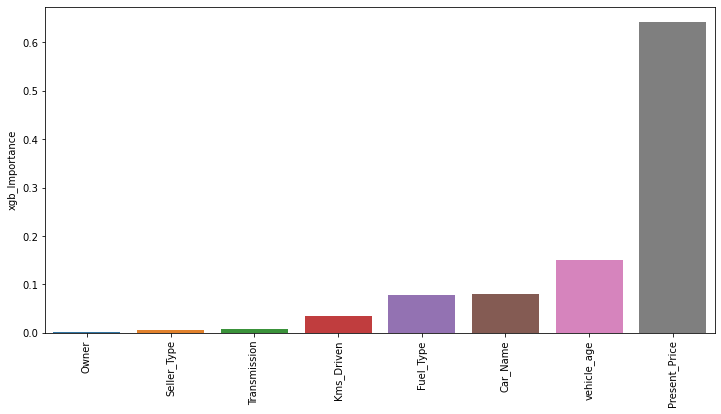

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [79]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

,ada_Importance,grad_Importance,xgb_Importance
Seller_Type,0.001096,0.013530,0.006116
Owner,0.001210,0.000259,0.001283
Transmission,0.002697,0.020118,0.008324
Car_Name,0.014086,0.091294,0.080600
Fuel_Type,0.016936,0.052514,0.078167
Kms_Driven,0.032930,0.032139,0.033690
vehicle_age,0.097546,0.054395,0.149856
Present_Price,0.833498,0.735751,0.641965


## New model

In [80]:
X_new = df[["vehicle_age",  "Present_Price"]]

In [81]:
X_new.head()

,vehicle_age,Present_Price
0,7,5.59
1,8,9.54
2,4,9.85
3,10,4.15
4,7,6.87


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=5)

In [83]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")

In [84]:
model.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror', random_state=101)

In [85]:
train_val(model, X_train, y_train, X_test, y_test)

,train,test
R2,0.991681,0.948123
mae,0.307787,0.770614
mse,0.212689,1.311378
rmse,0.461183,1.145154


In [86]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                             0.886573
test_neg_mean_absolute_error       -0.666894
test_neg_mean_squared_error        -2.357701
test_neg_root_mean_squared_error   -1.297375
dtype: float64

## Gridsearch for new XGBoost model

In [87]:
param_grid = {"n_estimators":[100, 300,500],'max_depth':[3,5,6,7], "learning_rate": [0.05, 0.1, 0.2],
             "subsample":[0.5, 1], "colsample_bytree":[0.5, 1]}

In [88]:
model = XGBRegressor(random_state=101, objective="reg:squarederror")
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [89]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=XGBRegressor(objective='reg:squarederror',
                                    random_state=101),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 300, 500],
                         'subsample': [0.5, 1]},
             scoring='neg_root_mean_squared_error')

In [90]:
grid_model.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.2,
 'max_depth': 3,
 'n_estimators': 100,
 'subsample': 0.5}

In [91]:
grid_model.best_score_

-1.193325439318438

In [92]:
train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992991,0.960710
mae,0.284564,0.661908
mse,0.179196,0.993194
rmse,0.423315,0.996591
